In [1]:


# Dependencies
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")
import numpy as np
import pandas as pd
from scipy.stats import sem

# Read data
ctData = pd.read_csv("data/clinicaltrial_data.csv")
mdData = pd.read_csv("data/mouse_drug_data.csv")

# Merge datasets on Mouse ID to get Drug for each trial
clinicalTrials = pd.merge(ctData, mdData, on="Mouse ID")
clinicalTrials = clinicalTrials.sort_values(["Timepoint", "Tumor Volume (mm3)"])

# Reset index, and get rid of original index column
clinicalTrials = clinicalTrials.reset_index()
clinicalTrials.drop(clinicalTrials.columns[0], axis=1, inplace=True)
clinicalTrials.head(20)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril
5,h246,0,45.0,0,Ketapril
6,p189,0,45.0,0,Ketapril
7,n923,0,45.0,0,Ketapril
8,q119,0,45.0,0,Ketapril
9,f993,0,45.0,0,Naftisol


In [2]:



# Set "global" variables for our drug names (column headers) and their scatter plot colors
Capomulin = "Capomulin"
Infubinol = "Infubinol"
Ketapril = "Ketapril"
placebo = "Placebo"
colorOne = "red"
colorTwo = "blue"
colorThree = "green"
colorFour = "black"

# Create dataframes to house our data to sample for our standard error calculation. These will be all 
#  measurements for each drug at each timepoint (a list of lists)
capomulinData = clinicalTrials[clinicalTrials["Drug"] == "Capomulin"]
infubinolData = clinicalTrials[clinicalTrials["Drug"] == "Infubinol"]
ketaprilData = clinicalTrials[clinicalTrials["Drug"] == "Ketapril"]
placeboData = clinicalTrials[clinicalTrials["Drug"] == "Placebo"]

# Store timepoint values in an array
timepointsList = clinicalTrials["Timepoint"].unique()

# For each drug, create Tumor Volume datasets for each timepoint 
tumorvolumeCapomulin = [capomulinData.loc[capomulinData["Timepoint"] == tp, "Tumor Volume (mm3)"] for tp in timepointsList]
tumorvolumeInfubinol = [infubinolData.loc[infubinolData["Timepoint"] == tp, "Tumor Volume (mm3)"] for tp in timepointsList]
tumorvolumeKetapril = [ketaprilData.loc[ketaprilData["Timepoint"] == tp, "Tumor Volume (mm3)"] for tp in timepointsList]
tumorvolumePlacebo = [placeboData.loc[placeboData["Timepoint"] == tp, "Tumor Volume (mm3)"] for tp in timepointsList]

# For each drug, create Metastatic Sites datasets for each timepoint 
metaCapomulin = [capomulinData.loc[capomulinData["Timepoint"] == tp, "Metastatic Sites"] for tp in timepointsList]
metaInfubinol = [infubinolData.loc[infubinolData["Timepoint"] == tp, "Metastatic Sites"] for tp in timepointsList]
metaKetapril = [ketaprilData.loc[ketaprilData["Timepoint"] == tp, "Metastatic Sites"] for tp in timepointsList]
metaPlacebo = [placeboData.loc[placeboData["Timepoint"] == tp, "Metastatic Sites"] for tp in timepointsList]



In [3]:



# Create function to output Timepoint-grouped summary table for our 3 drugs and placebo - given a designated column to measure
def summaryTable(df, col):
    # Break down the above dataframe by the drugs we are concerned with
    dfCapomulin = df[df["Drug"] == "Capomulin"]
    dfInfubinol = df[df["Drug"] == "Infubinol"]
    dfKetapril = df[df["Drug"] == "Ketapril"]
    dfPlacebo = df[df["Drug"] == "Placebo"]
        
    # Merge the drug-specific dataframes into a summary dataframe, on the Timepoint column
    drugSummary = pd.merge(dfCapomulin, dfInfubinol, on="Timepoint")
    # Rename the columns so they match our drugs
    drugSummary = drugSummary.rename(columns={ f"{col}_x": "Capomulin", f"{col}_y": "Infubinol" })
    
    drugSummary = pd.merge(drugSummary, dfKetapril, on="Timepoint")
    
    drugSummary = pd.merge(drugSummary, dfPlacebo, on="Timepoint")
    # Rename the columns so they match our drugs
    drugSummary = drugSummary.rename(columns={ f"{col}_x": "Ketapril", f"{col}_y": "Placebo"})

    # Drop the columns we don't need anymore
    drugSummary.drop(drugSummary.columns[[0,3,5,7]], axis=1, inplace=True)
  
    # Return dataframe
    return drugSummary

def scatterplotFunc(df, m, plot_title):
    # Create series' for the timepoint, as well as each drug's (and placebo's) Tumor or Metastatic Site changes over time
    timepoints = df.loc[:, "Timepoint"]
    seriesCapomulin = df.loc[:, Capomulin]
    seriesInfubinol = df.loc[:, Infubinol]
    seriesKetapril  = df.loc[:, Ketapril]
    seriesplacebo = df.loc[:, placebo]
    
    
    # Set up ticks, limits, labels, and title
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(min(timepoints), max(timepoints)+1, 5))
    ax.tick_params(direction="out", color="black", width=2, length=6, axis="both", pad=3)
    ax.set_xlim(-1, max(timepoints) + 3)
    ax.set_xlabel("Time (Days)", fontsize=16)
    ax.set_ylabel(m, fontsize=16)   
    ax.set_title(plot_title, fontsize=20)
    ax.set_xmargin = 20
    # Add padding below and to left of the ticks in the axes
    ax.xaxis.labelpad = 17
    ax.yaxis.labelpad = 17
    ax.title.set_position([.5, 1.04])
    
    # Build scatter plots, asemigning handles for our legend based on colors above
    handle1 = ax.scatter(timepoints, seriesCapomulin, facecolors=colorOne, marker="o", label=Capomulin)
    handle2 = ax.scatter(timepoints, seriesInfubinol, facecolors=colorTwo, marker="^", label=Infubinol)
    handle3 = ax.scatter(timepoints, seriesKetapril, facecolors=colorThree,  marker="s", label=Ketapril)
    handle4 = ax.scatter(timepoints, seriesplacebo, facecolors=colorFour, marker="D", label=placebo)
    
    # Build line plots on top of scatters with same colors as above
    ax.plot(timepoints, seriesCapomulin, '--', color=colorOne, linewidth=1)
    ax.plot(timepoints, seriesInfubinol, '--', color=colorTwo, linewidth=1)
    ax.plot(timepoints, seriesKetapril, '--', color=colorThree, linewidth=1)
    ax.plot(timepoints, seriesplacebo, '--', color=colorFour, linewidth=1)

    # Define scatter plot legend
    ax.legend(handles=[handle1, handle2, handle3, handle4], loc='best', frameon=True, facecolor="white")

    if (m != "Mouse Count"):
        # Build error bar means and standard error datasets
        if (m == "Tumor Volume (mm3)"):
            meanofCapomulin   = [np.mean(c) for c in tumorvolumeCapomulin]
            meanofInfubinol   = [np.mean(i) for i in tumorvolumeInfubinol]
            meanofKetapril   = [np.mean(k) for k in tumorvolumeKetapril]
            meanofPlacebo = [np.mean(p) for p in tumorvolumePlacebo]
            stderrCapomulin      = [sem(c) for c in tumorvolumeCapomulin]
            stderrInfubinol      = [sem(i) for i in tumorvolumeInfubinol]
            stderrKetapril      = [sem(k) for k in tumorvolumeKetapril]
            stderrPlacebo    = [sem(p) for p in tumorvolumePlacebo]
        elif (m == "Metastatic Sites"):
            # Define means and standard error margin values (for our error bars)
            meanofCapomulin   = [np.mean(c) for c in metaCapomulin]
            meanofInfubinol   = [np.mean(i) for i in metaInfubinol]
            meanofKetapril   = [np.mean(k) for k in metaKetapril]
            meanofPlacebo = [np.mean(p) for p in metaPlacebo]
            stderrCapomulin      = [sem(c) for c in metaCapomulin]
            stderrInfubinol      = [sem(i) for i in metaInfubinol]
            stderrKetapril      = [sem(k) for k in metaKetapril]
            stderrPlacebo    = [sem(p) for p in metaPlacebo]

        # Place error bars in axis
        ax.errorbar(timepoints, meanofCapomulin, stderrCapomulin, color=colorOne, fmt="o", capsize=5, elinewidth=1, markeredgewidth=1)
        ax.errorbar(timepoints, meanofInfubinol, stderrInfubinol, color=colorTwo, fmt="^", capsize=5, elinewidth=1, markeredgewidth=1)
        ax.errorbar(timepoints, meanofKetapril, stderrKetapril, color=colorThree, fmt="s", capsize=5, elinewidth=1, markeredgewidth=1)
        ax.errorbar(timepoints, meanofPlacebo, stderrPlacebo, color=colorFour, fmt="D", capsize=5, elinewidth=1, markeredgewidth=1)



In [4]:


# Set column to measure 
measureCol = "Tumor Volume (mm3)"

# Great a grouping dataframe to visualize average tumor growth over the course of the timepoints
drugsGrouping = clinicalTrials.groupby(["Drug", "Timepoint"])

# List the average Tumor Volume for our grouping in a dataframe
avgTumorVolume = pd.DataFrame(drugsGrouping[measureCol].mean()).reset_index()
avgTumorVolume.head(10)



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:


# Create drug summary table for Tumor Volume
volumeSummary = summaryTable(avgTumorVolume, measureCol)
volumeSummary.head(50)



,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


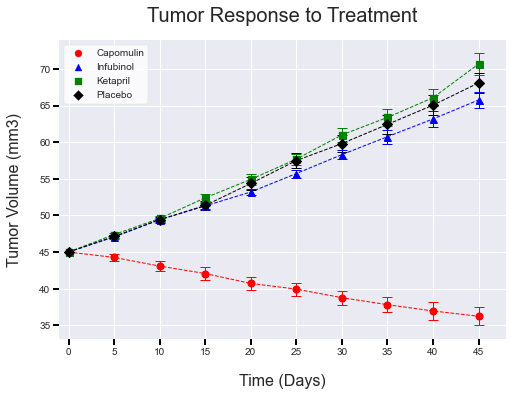

In [6]:


# Call function to create scatter plots for Tumor Volume data
scatterplotFunc(volumeSummary, measureCol, "Tumor Response to Treatment")

# Display scatter plot
plt.show()



In [7]:


# Set column to measure
measureCol = "Metastatic Sites"

# Group our drug and timepoint data by the average # of metastatic sites
metaSites = pd.DataFrame(drugsGrouping[measureCol].mean()).reset_index()
metaSites.head(10)



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [8]:


# Create drug summary table for Metastatic Sites
metaSummary = summaryTable(metaSites, measureCol)
metaSummary.head(40)



,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


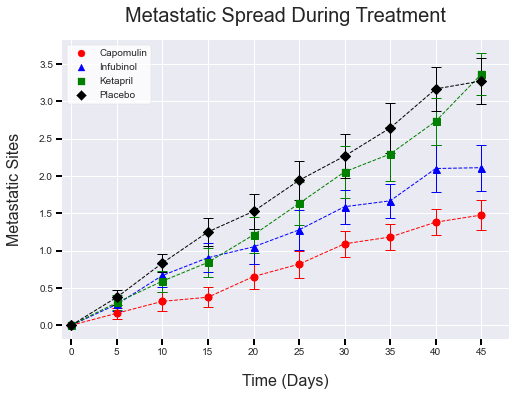

In [9]:


# Call function to define scatter plot for Metastatic Site measurement
scatterplotFunc(metaSummary, measureCol, "Metastatic Spread During Treatment")

# Display scatter plot
plt.show()



In [10]:


# Group our drug and timepoint data by the average # mice still participating
avgNumMice = pd.DataFrame(drugsGrouping["Tumor Volume (mm3)"].count()).reset_index()

# Rename aggregate column heading to make more sense
avgNumMice = avgNumMice.rename(columns={f"Tumor Volume (mm3)": "Mouse Count"})
avgNumMice.head(10)


#  #### Summary table displaying average mouse count by timepoint, with columns for each drug


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [11]:


# Create drug summary table for Metastatic Sites
mscount = summaryTable(avgNumMice, "Mouse Count")
mscount.head(40)



,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


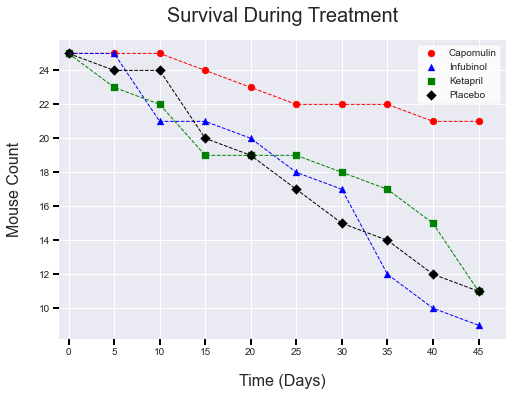

In [12]:


# Call function to define scatter plot for Metastatic Site measurement
scatterplotFunc(mscount, "Mouse Count", "Survival During Treatment")

# Display scatter plot
plt.show()



In [13]:


# Build a series for each drug's % tumor volume change over the course of the timepoints
capomulinPercentChange = (volumeSummary[Capomulin][len(timepointsList)-1] - volumeSummary[Capomulin][0]) / volumeSummary[Capomulin][0]
infubinolPercentChange = (volumeSummary[Infubinol][len(timepointsList)-1] - volumeSummary[Infubinol][0]) / volumeSummary[Infubinol][0]
KetaprilPercentChange  = (volumeSummary[Ketapril][len(timepointsList)-1] - volumeSummary[Ketapril][0]) / volumeSummary[Ketapril][0]
placeboPercentChange   = (volumeSummary[placebo][len(timepointsList)-1] - volumeSummary[placebo][0])  / volumeSummary[placebo][0]

percentChange = pd.Series([capomulinPercentChange, 
                            infubinolPercentChange,
                            KetaprilPercentChange,
                            placeboPercentChange],
                           [Capomulin, Infubinol, Ketapril, placebo])
percentChange



Capomulin   -0.194753
Infubinol    0.461235
Ketapril     0.570288
Placebo      0.512980
dtype: float64

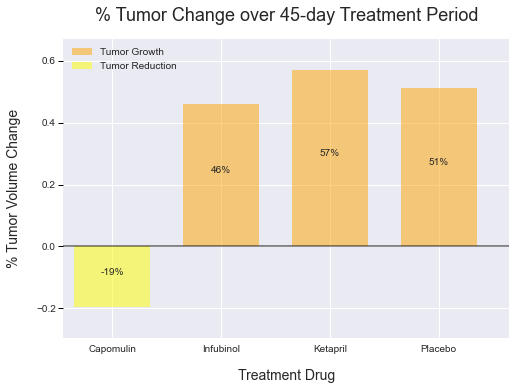

In [14]:


# Define our Bar chart 
x_axis = np.arange(0, 4, 1)
barwidth = 0.7       # the width of the bars

# Create our axis variable
fig, ax = plt.subplots()

# Define masks for coloring bars
colorNeg = percentChange < 0
colorPos = percentChange >= 0

# Defint our bars
rects1 = ax.bar(x_axis[colorPos], percentChange[colorPos], color="orange", alpha=0.5, align="edge", width=barwidth)
rects2 = ax.bar(x_axis[colorNeg], percentChange[colorNeg], color="yellow", alpha=0.5, align="edge", width=barwidth)

# Draw a horizontal line at y=0
ax.hlines(0, -0.1, 10, alpha=0.5)
    
# Set the limits of the x axis (with some whitespace to left and right)
ax.set_xlim(-0.1, len(x_axis))

# Set the limits of the y axis (add some whitespace to the top/bottom of the chart)
ax.set_ylim(min(percentChange) - .1, max(percentChange) + .1)

# add some text for labels, title and axes ticks
ax.set_ylabel("% Tumor Volume Change", fontsize=14)
ax.set_xlabel("Treatment Drug", fontsize=14)
ax.set_title("% Tumor Change over 45-day Treatment Period", fontsize=18)

# Create the ticks for our bar chart's x axis
ax.tick_params(direction="out", color="black", width=1, length=5, axis="y", pad=2)
ax.set_xticks([value+0.35 for value in x_axis])
ax.set_xticklabels(percentChange.index)

# Add some padding below and to left of the ticks in the axes
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.title.set_position([.5, 1.04])

# Add a legend for the red vs. green coloring
ax.legend((rects1[0], rects2[0]), ('Tumor Growth', 'Tumor Reduction'), loc="upper left")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height() # Get the exact height of the bar
        height_formatted = "{0:.0f}%".format(rect.get_height() * 100)  # format it as a percentage for what to display
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height, height_formatted, ha='center', va='bottom')

# Add our percentage labels to our bars
autolabel(rects1)
autolabel(rects2)

# Display bar chart
plt.show()

